## 🧠 **Perceptrón Multicapa (MLP)** 🧠

---

### **Base de datos:**  
Utilizaremos la base de datos Iris, integrada en `sklearn.datasets`. Esta base consiste en tres clases de flores Iris (Iris setosa, Iris versicolor, Iris virginica) y cuatro características numéricas (largo y ancho del sépalo, largo y ancho del pétalo).


---
### **Objetivo:**  
Predecir la especie de la flor a partir de las características medidas.


---

### 1. Importaciones 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Configuraciones para gráficas
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["font.size"] = 12

---

### 2. Cargar datos

In [6]:
iris = load_iris()
X = iris.data
y = iris.target

# Convertir los datos a un DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in y]

---

### 3. Exploración de los datos

In [8]:
# Mostrar primeras filas de datos
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Mostrar información general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Mostrar estadísticas de los datos
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


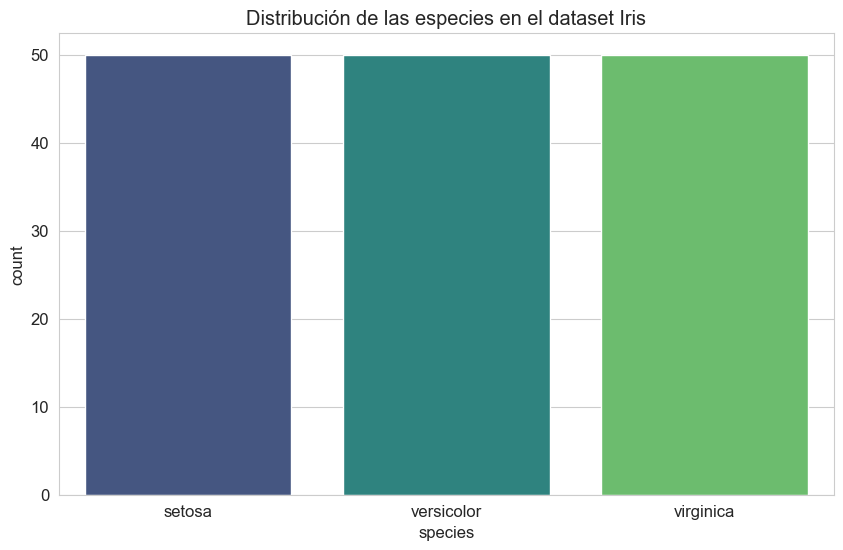

In [15]:
# Visualizar la distribución de las clases
sns.countplot(x='species', data=df, hue='species', palette='viridis')
plt.title('Distribución de las especies en el dataset Iris')
plt.show()

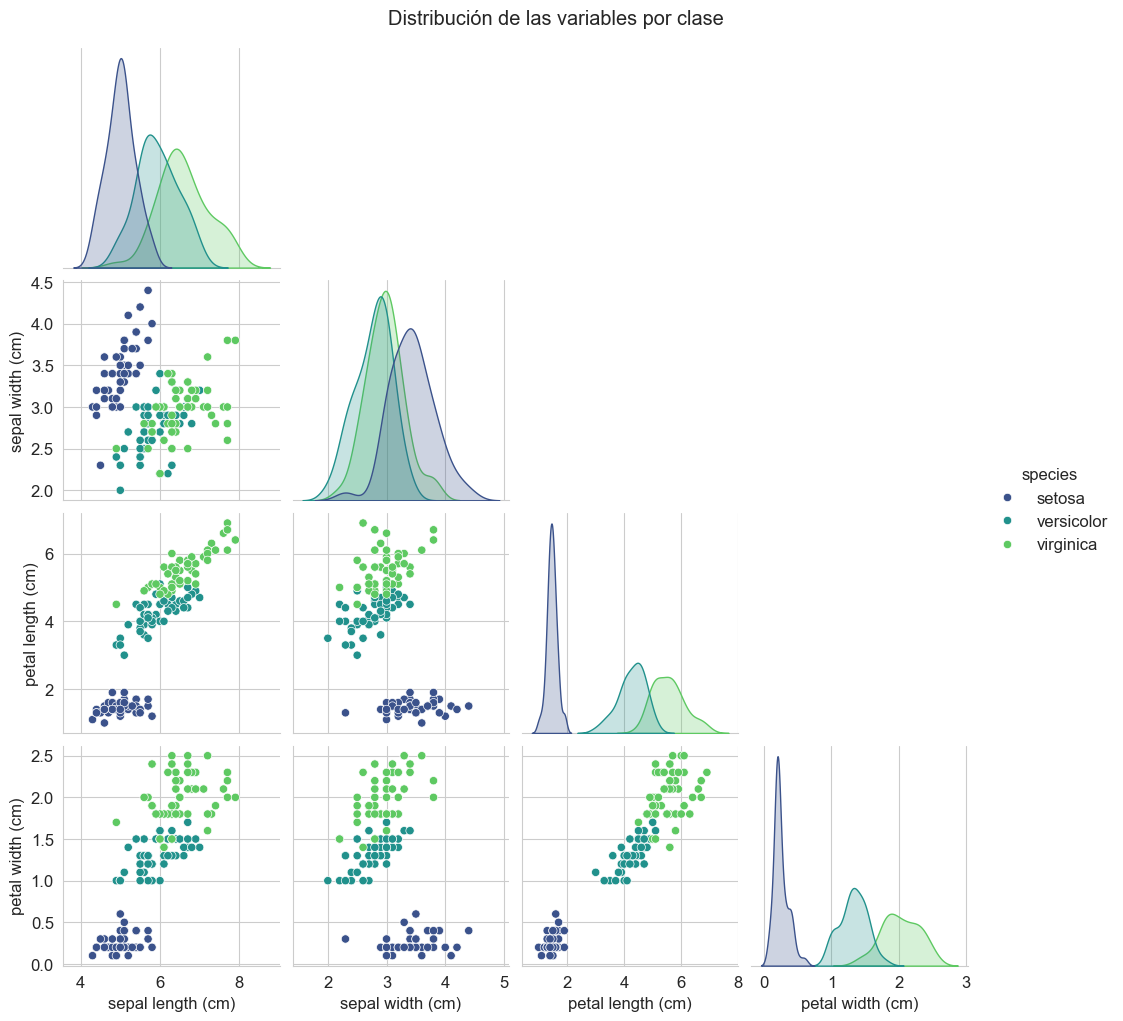

In [27]:
# Visualizar pares de características
sns.pairplot(df, hue='species', palette='viridis', corner=True)
plt.suptitle('Distribución de las variables por clase', y=1.02)
plt.show()

**Observación:** Las tres especies están relativamente bien diferenciadas en el espacio multidimensional de las características.

---

### 3. División de los datos en entrenamiento y prueba

In [18]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop('species', axis=1).values
y = [list(iris.target_names).index(sp) for sp in df['species']]  # convertimos a números (0,1,2) para mejor manejo
y = np.array(y)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [19]:
# Estandarización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

### 4. Entrenamiento del modelo MLP

A continuación, entrenaremos un MLP utilizando MLPClassifier de sklearn.

Parámetros base:
- hidden_layer_sizes=(10,): Una sola capa oculta con 10 neuronas.
- activation='relu': Función de activación ReLU.
- solver='adam': Optimizador Adam.
- max_iter=300: Máximo de iteraciones.
- random_state=42: Semilla para reproducibilidad.

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(10,),
                    activation='relu',
                    solver='lbfgs',
                    max_iter=300,
                    random_state=42)

mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42,
              solver='lbfgs')

---

### 5. Evaluación del modelo (métricas de desempeño)

In [23]:
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Exactitud (Accuracy): {:.2f}%".format(accuracy*100))
print("F1-score (ponderado): {:.2f}".format(f1))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Exactitud (Accuracy): 88.89%
F1-score (ponderado): 0.89

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



---

### 6. Visualización de resultados
#### 6.1 Matriz de confusión
La matriz de confusión nos permitirá ver la distribución de las predicciones correctas e incorrectas.

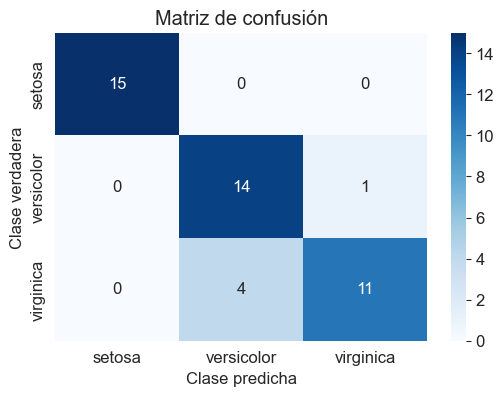

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Matriz de confusión')
plt.ylabel('Clase verdadera')
plt.xlabel('Clase predicha')
plt.show()

**Observación:** Hay confusiones en la clasificación *virginica* con *versicolor*. Hay que reajustar el modelo para mejorarlo en este aspecto. 

#### 6.2 Curvas ROC y AUC
Para trazar las curvas ROC, necesitamos binarizar las etiquetas, ya que tenemos 3 clases. Esto nos permitirá trazar una curva por clase.

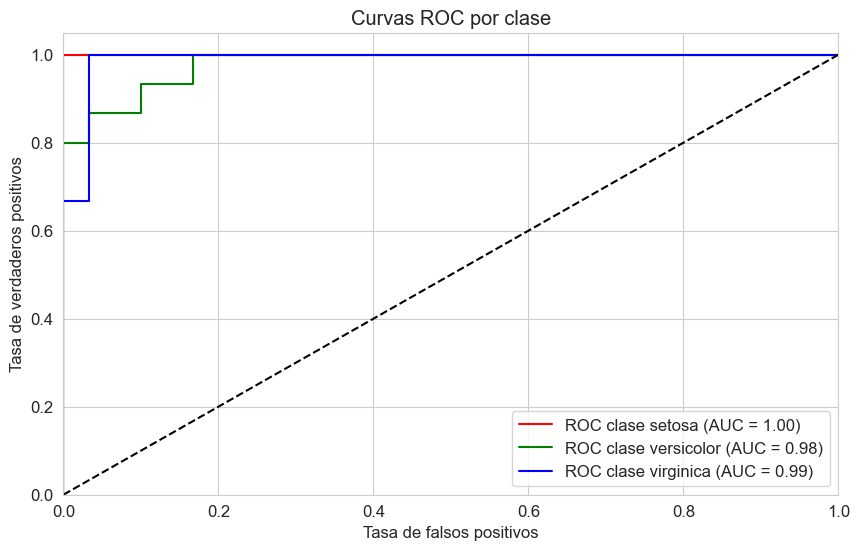

In [26]:
# Binarización de las etiquetas
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = mlp.predict_proba(X_test)

# Curvas ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC para cada clase
colors = ['red', 'green', 'blue']
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC clase {0} (AUC = {1:0.2f})'
             ''.format(iris.target_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curvas ROC por clase')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc="lower right")
plt.show()


---

###  7. Conclusiones
- El MLP entrenado alcanzó una exactitud y un F1-score altos en el conjunto de prueba, lo cual sugiere que el modelo logra separar adecuadamente las tres especies de Iris.
- La matriz de confusión muestra que casi todas las instancias se clasificaron correctamente.
- Las curvas ROC por clase presentan áreas bajo la curva (AUC) superiores a 0.9, lo cual indica un buen desempeño del modelo.